
i



##Basic Setup

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 64.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.2/802.2 kB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 55.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 9.9 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 34.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


##Data Import

In [ ]:
data = pd.read_csv("diabetes.csv")

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

Replace all 0 skin thickness with the mean value

In [ ]:
print("Number of zero skin thickness:", sum(data['SkinThickness']==0))

Number of zero skin thickness: 227


In [ ]:
print("Mean skin thickness for non-zero-values:", sum(data['SkinThickness'])/(768-sum(data['SkinThickness']==0)))

Mean skin thickness for non-zero-values: 29.153419593345657


In [ ]:
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_to_replace] = data[cols_to_replace].replace(0, np.nan)

means = data[cols_to_replace].mean(skipna=True)


data = data.fillna(means)

filled_stats = data[cols_to_replace].agg(['max', 'min', 'mean']).T
filled_stats.rename(columns={'mean': 'average'}, inplace=True)

filled_stats, means


(                 max   min     average
 Glucose        199.0  44.0  121.686763
 BloodPressure  122.0  24.0   72.405184
 SkinThickness   99.0   7.0   29.153420
 Insulin        846.0  14.0  155.548223
 BMI             67.1  18.2   32.457464,
 Glucose          121.686763
 BloodPressure     72.405184
 SkinThickness     29.153420
 Insulin          155.548223
 BMI               32.457464
 dtype: float64)

In [ ]:
edited_stats = data.describe().loc[['max', 'min', 'mean']].T
edited_stats.rename(columns={'mean': 'average'}, inplace=True)

edited_stats


,max,min,average
Pregnancies,17.00,0.000,3.845052
Glucose,199.00,44.000,121.686763
BloodPressure,122.00,24.000,72.405184
SkinThickness,99.00,7.000,29.153420
Insulin,846.00,14.000,155.548223
BMI,67.10,18.200,32.457464
DiabetesPedigreeFunction,2.42,0.078,0.471876
Age,81.00,21.000,33.240885
Outcome,1.00,0.000,0.348958


In [ ]:
df = data
df.shape

(768, 9)

In [ ]:
df['SkinThickness'] = df['SkinThickness'].replace(0, 29)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
df_train.shape

(614, 9)

In [ ]:
df_test.shape

(154, 9)

#Use OLS, best subset, forward selection, random forest ... to campare which does best

##Correlation Plot and Covariance Matrix

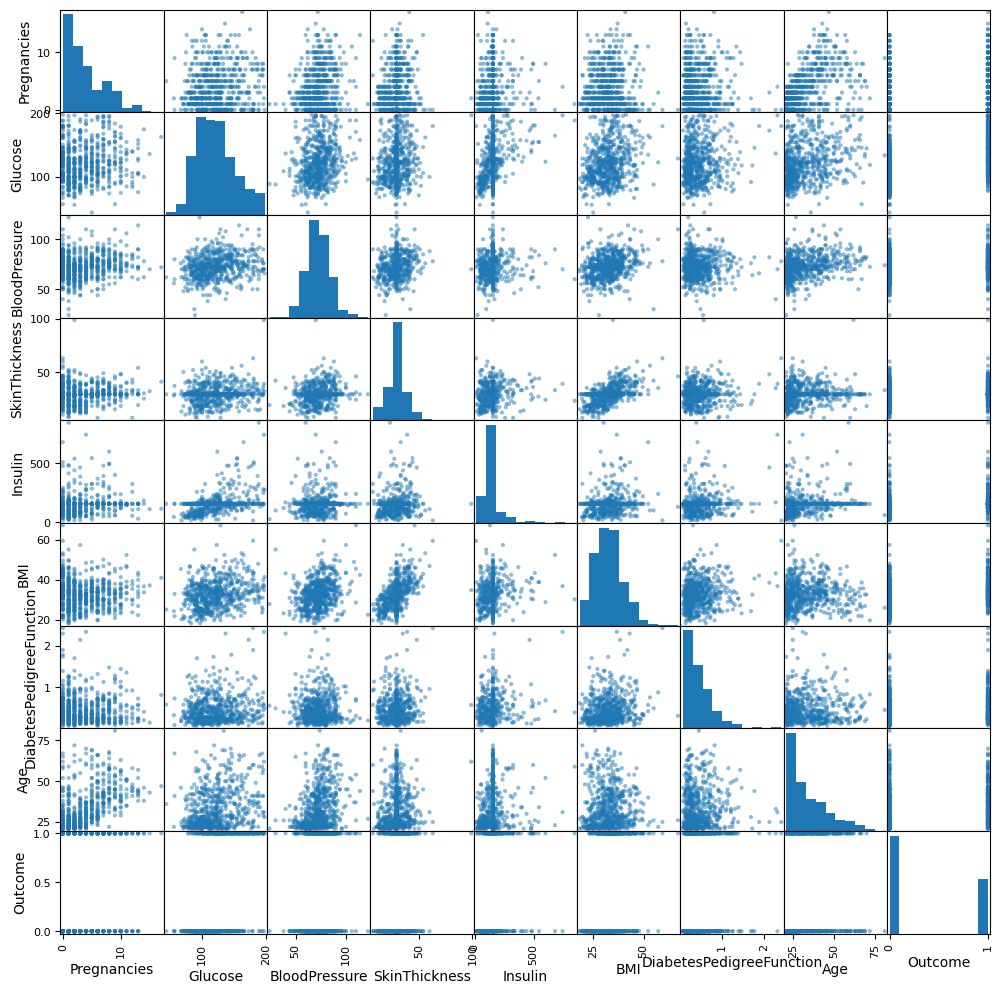

In [ ]:
pd.plotting.scatter_matrix(df_train, figsize=(12,12))
plt.show()

In [ ]:
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129406,0.189161,0.073995,0.063487,-0.007550,-0.047203,0.539582,0.193991
Glucose,0.129406,1.000000,0.223856,0.168225,0.424555,0.252352,0.122439,0.284982,0.490399
BloodPressure,0.189161,0.223856,1.000000,0.198708,0.063381,0.283517,-0.008425,0.318606,0.146295
SkinThickness,0.073995,0.168225,0.198708,1.000000,0.128742,0.545312,0.103921,0.109514,0.188089
Insulin,0.063487,0.424555,0.063381,0.128742,1.000000,0.153159,0.107155,0.134318,0.199055
BMI,-0.007550,0.252352,0.283517,0.545312,0.153159,1.000000,0.161797,0.005599,0.314197
DiabetesPedigreeFunction,-0.047203,0.122439,-0.008425,0.103921,0.107155,0.161797,1.000000,0.027692,0.163334
Age,0.539582,0.284982,0.318606,0.109514,0.134318,0.005599,0.027692,1.000000,0.238986
Outcome,0.193991,0.490399,0.146295,0.188089,0.199055,0.314197,0.163334,0.238986,1.000000


##OLS Regression

In [ ]:
y_train = df_train['Outcome']
X_train = df_train.drop(['Outcome'], axis = 1).astype('float64')
y_test = df_test['Outcome']
X_test = df_test.drop(['Outcome'], axis = 1).astype('float64')

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     34.24
Date:                Fri, 26 Apr 2024   Prob (F-statistic):           1.26e-44
Time:                        21:29:43   Log-Likelihood:                -305.89
No. Observations:                 614   AIC:                             629.8
Df Residuals:                     605   BIC:                             669.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.9655      0.118     -8.177      0.000      -1.197      -0.734
Pregnancies                  0.0164      0.006      2.932      0.003       0.005       0.027
Glucose                      0.0066      0.001     10.427      0.000       0.005       0.008
BloodPressure               -0.0020      0.002     -1.349      0.178      -0.005       0.001
SkinThickness               -0.0008      0.002     -0.379      0.704      -0.005       0.003
Insulin                     -0.0002      0.000     -0.875      0.382      -0.001       0.000
BMI                          0.0154      0.003      5.241      0.000       0.010       0.021
DiabetesPedigreeFunction     0.1218      0.050      2.445      0.015       0.024       0.220
Age                          0.0030      0.002      1.763      0.078      -0.000       0.006
==============================================================================
Omnibus:                       35.384   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.751
Skew:                           0.322   Prob(JB):                     1.89e-05
Kurtosis:                       2.339   Cond. No.                     1.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:

train_pred = results.predict(X_train)
ols_train_mse = np.mean((y_train - train_pred)**2)
print('Training MSE:', ols_train_mse)

test_pred = results.predict(X_test)
ols_test_mse = np.mean((y_test - test_pred)**2)
print('Test MSE:', ols_test_mse)

Training MSE: 0.1585820054514869
Test MSE: 0.13921144800508753


##Best Subset Selection

In [ ]:
X_train = X_train.drop(['const'], axis=1)
X_test = X_test.drop(['const'], axis=1)

In [ ]:
def processSubset(feature_set):                   # regr: Regression Model          RSS: Risedual Sqared Sum
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_train[list(feature_set)]) - y_train) ** 2).sum()
    return {"model":regr, "RSS":RSS}

def getBest(k):  # k is the number of predictors to do best selection

    tic = time.time()        # Set a timer

    results = []          # Collection of models and RSS

    for combo in itertools.combinations(X_train.columns, k):
        results.append(processSubset(combo))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)          # A nicer frame of results

    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]   # The best model

    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

import time
import itertools

models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(3,4):            # i can only be 3
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 56 models on 3 predictors in 0.13653945922851562 seconds.
Total elapsed time: 0.13969659805297852 seconds.


In [ ]:
print(models_best.loc[3, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.498
Model:                            OLS   Adj. R-squared (uncentered):              0.495
Method:                 Least Squares   F-statistic:                              201.9
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                    5.56e-91
Time:                        21:31:55   Log-Likelihood:                         -346.04
No. Observations:                 614   AIC:                                      698.1
Df Residuals:                     611   BIC:                                      711.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
best_model_bss = models_best.loc[3, "model"]
features = ['Pregnancies','Glucose','BloodPressure']

X_train_bss = X_train[features]
train_pred = best_model_bss.predict(X_train_bss)
bes_train_mse = np.mean((y_train - train_pred)**2)
print('Training MSE:', bes_train_mse)

X_test_bss = X_test[features]
test_pred = best_model_bss.predict(X_test_bss)
bes_test_mse = np.mean((y_test - test_pred)**2)
print('Test MSE:', bes_test_mse)

Training MSE: 0.18073553892411687
Test MSE: 0.1660702030271926


##Forward Selection

In [ ]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]

    tic = time.time()

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,4):
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  8 models on 1 predictors in 0.021055936813354492 seconds.
Processed  7 models on 2 predictors in 0.019252300262451172 seconds.
Processed  6 models on 3 predictors in 0.01691126823425293 seconds.
Total elapsed time: 0.06882786750793457 seconds.


In [ ]:
print(models_fwd.loc[3, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.498
Model:                            OLS   Adj. R-squared (uncentered):              0.495
Method:                 Least Squares   F-statistic:                              201.9
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                    5.56e-91
Time:                        21:33:21   Log-Likelihood:                         -346.04
No. Observations:                 614   AIC:                                      698.1
Df Residuals:                     611   BIC:                                      711.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
best_model_fwd = models_fwd.loc[3, "model"]
features = ['Glucose','BloodPressure','Pregnancies']

X_train_fwd = X_train[features]
#X_train_fwd_with_intercept = sm.add_constant(X_train_fwd)
train_pred = best_model_fwd.predict(X_train_fwd)
for_train_mse = np.mean((y_train - train_pred)**2)
print('Training MSE:', for_train_mse)

X_test_fwd = X_test[features]
#X_test_fwd_with_intercept = sm.add_constant(X_test_fwd)
test_pred = best_model_fwd.predict(X_test_fwd)
for_test_mse = np.mean((y_test - test_pred)**2)
print('Test MSE:', for_test_mse)

Training MSE: 0.18073553892411687
Test MSE: 0.16607020302719264


##PCR

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler(with_std=True, with_mean=True)
X_train_scaled = scaler.fit_transform(X_train)

pca = PCA()
pca.fit(X_train_scaled)

pca = PCA(n_components=3)
scaler = StandardScaler(with_mean=True, with_std=True)
lin_reg = LinearRegression()
pipe = Pipeline([('scaler', scaler), ('pca', pca), ('lin_reg', lin_reg)])    # Apply PCR
pipe.fit(X_train, y_train)



Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=3)),
                ('lin_reg', LinearRegression())])

In [ ]:
coefficients = pipe.named_steps['lin_reg'].coef_
print("Coefficients:", coefficients)

train_pred = pipe.predict(X_train)
test_pred = pipe.predict(X_test)
pcr_train_mse = np.mean((y_train - train_pred)**2)
pcr_test_mse = np.mean((y_test - test_pred)**2)
print('Training MSE:', pcr_train_mse)
print('Test MSE:', pcr_test_mse)

Coefficients: [0.14867637 0.01532704 0.06041417]
Training MSE: 0.1756678083054893
Test MSE: 0.14387061806946558


##PLS

In [ ]:
from sklearn.cross_decomposition import PLSRegression

In [ ]:
pls = PLSRegression(n_components=3,
                   scale=True)
pls.fit(X_train, y_train)

PLSRegression(n_components=3)

In [ ]:
train_pred = pls.predict(X_train).reshape(-1)
pls_train_mse = np.mean((train_pred - y_train)**2)
print('Training MSE:', np.mean((train_pred - y_train)**2))

test_pred = pls.predict(X_test).reshape(-1)
pls_test_mse = np.mean((test_pred - y_test)**2)
print('Test MSE:', pls_test_mse)

Training MSE: 0.1586104519579192
Test MSE: 0.1392385345231498


In [ ]:
loadings = pls.x_loadings_
scores = pls.x_scores_

n_components = 3
for i in range(n_components):
    component_loadings = loadings[:, i]
    sorted_indices = np.argsort(np.abs(component_loadings))[::-1]  # Sort indices by absolute magnitude
    top_features_indices = sorted_indices[:10]  # Get the indices of the top 10 features
    top_features = X_train.columns[top_features_indices]  # Assuming X_train is a DataFrame
    print(f"Top features for component {i+1}: {top_features}")

Top features for component 1: Index(['Glucose', 'BMI', 'Age', 'SkinThickness', 'Insulin', 'BloodPressure',
       'Pregnancies', 'DiabetesPedigreeFunction'],
      dtype='object')
Top features for component 2: Index(['BloodPressure', 'Glucose', 'SkinThickness', 'Age',
       'DiabetesPedigreeFunction', 'Pregnancies', 'Insulin', 'BMI'],
      dtype='object')
Top features for component 3: Index(['Insulin', 'DiabetesPedigreeFunction', 'Pregnancies', 'BloodPressure',
       'Age', 'BMI', 'Glucose', 'SkinThickness'],
      dtype='object')


##Ridge and Lasso

In [ ]:
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from matplotlib.pyplot import subplots

In [ ]:
lambdas = 10**np.linspace(4, -6, 101)

K=5
kfold = skm.KFold(K, random_state=123, shuffle=True)

ridgeCV = skl.ElasticNetCV(alphas=lambdas,
                           l1_ratio=0,
                           cv=kfold)
scaler = StandardScaler(with_mean=True, with_std=True)
pipeCV = Pipeline(steps=[('scaler', scaler), ('ridge', ridgeCV)])
pipeCV.fit(X_train, y_train)
tuned_ridge = pipeCV.named_steps['ridge']

print("Tuned Alpha for Ridge:", tuned_ridge.alpha_)

Tuned Alpha for Ridge: 0.07943282347242805


In [ ]:
ridge = skl.ElasticNet(alpha=tuned_ridge.alpha_, l1_ratio=0)
scaler = StandardScaler(with_mean=True, with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.07943282347242805, l1_ratio=0))])

In [ ]:
train_pred = pipe.predict(X_train)
rid_train_mse = np.mean((y_train - train_pred)**2)
print('Training MSE:', np.mean((y_train - train_pred)**2))
test_pred = pipe.predict(X_test)
rid_test_mse = np.mean((y_test - test_pred)**2)
print('Test MSE:', rid_test_mse)

Training MSE: 0.15894900451394114
Test MSE: 0.13873909339962215


In [ ]:
lassoCV = skl.ElasticNetCV(n_alphas=100,
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler), ('lasso', lassoCV)])
pipeCV.fit(X_train, y_train)
tuned_lasso = pipeCV.named_steps['lasso']
print("Tuned Alpha for Lasso:", tuned_lasso.alpha_)

Tuned Alpha for Lasso: 0.01660573680690913


In [ ]:
print(X_train.columns.values)
print(tuned_lasso.coef_)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']
[ 0.04317758  0.18252337 -0.          0.         -0.          0.08392991
  0.02730522  0.0215632 ]


In [ ]:
lasso = skl.ElasticNet(alpha=tuned_lasso.alpha_, l1_ratio=1)
scaler = StandardScaler(with_mean=True, with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('lasso', lasso)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', ElasticNet(alpha=0.01660573680690913, l1_ratio=1))])

In [ ]:
train_pred = pipe.predict(X_train)
las_train_mse = np.mean((y_train - train_pred)**2)
print('Training MSE:', las_train_mse)
test_pred = pipe.predict(X_test)
las_test_mse = np.mean((y_test - test_pred)**2)
print('Test MSE:', las_test_mse)

Training MSE: 0.1601746976859794
Test MSE: 0.1392160448313773


##Decision Tree

In [ ]:
import sklearn.model_selection as skm
from ISLP.models import ModelSpec as MS
from matplotlib.pyplot import subplots
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import plot_tree

In [ ]:
model = MS(X_train, intercept=False)
D = model.fit_transform(X_train)
feature_names = list(X_train.columns)
X = np.asarray(D)

reg = DTR(random_state=123)
reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

In [ ]:
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
num_samples_per_splits = np.arange(2,11,2)
num_min_samples_leaf = range(1,6)


param_grid = {'ccp_alpha': ccp_path.ccp_alphas,
              'min_samples_split': num_samples_per_splits,
              'min_samples_leaf': num_min_samples_leaf
             }


kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)


grid = skm.GridSearchCV(reg,
                        param_grid,
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')


G = grid.fit(X_train, y_train)

best_ = grid.best_estimator_
print(grid.best_params_, np.mean((y_test - best_.predict(X_test))**2))

{'ccp_alpha': 0.005593653082296535, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.15299541631872235


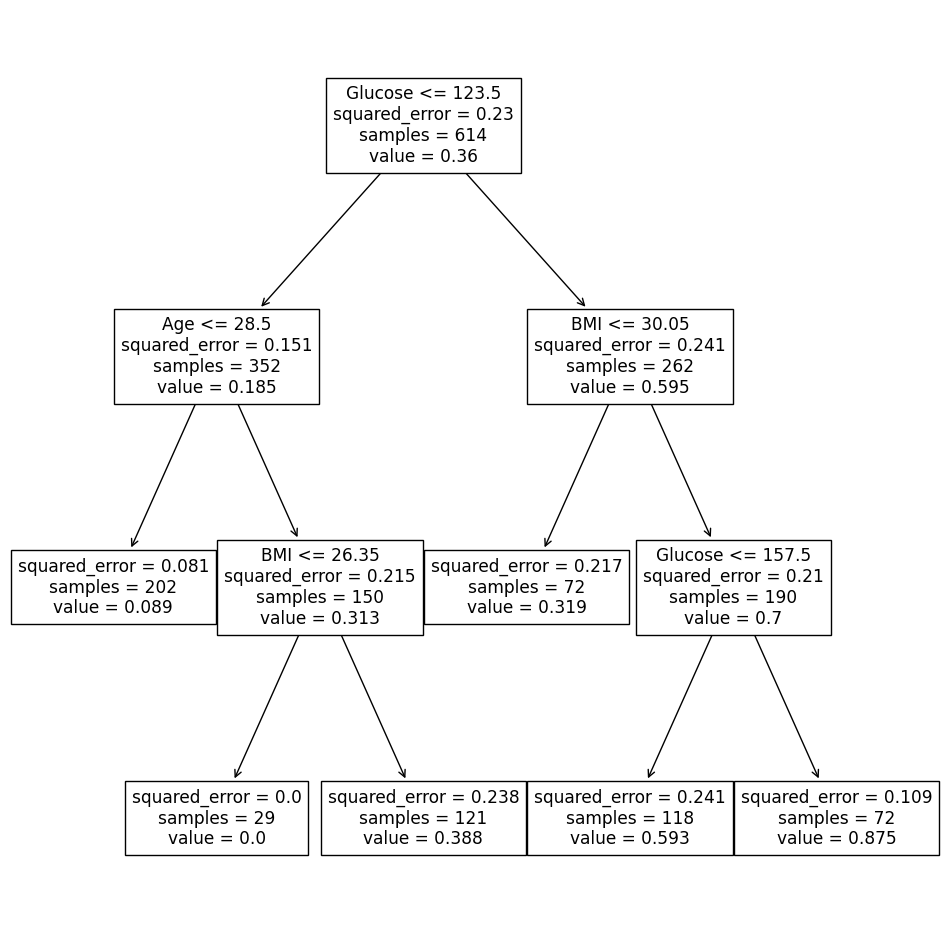

In [ ]:
ax = subplots(figsize=(12,12))[1]

plot_tree(best_,
          feature_names=feature_names,
          ax=ax);

In [ ]:
dec_train_mse = np.mean((y_train - best_.predict(X_train))**2)
print('Training MSE:', dec_train_mse)
dec_test_mse = np.mean((y_test - best_.predict(X_test))**2)
print('Test MSE:', dec_test_mse)

Training MSE: 0.15821204447201495
Test MSE: 0.15299541631872235


##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RF

In [ ]:
train_errs = list()
test_errs = list()
for m in range(3,14):
    rf = RF(max_features=m, random_state=123).fit(X_train, y_train)

    y_train_pred_RF = rf.predict(X_train)
    train_err = np.mean((y_train - y_train_pred_RF)**2)

    y_test_pred_RF = rf.predict(X_test)
    test_err = np.mean((y_test - y_test_pred_RF)**2)

    feature_imp = pd.DataFrame({'importance':rf.feature_importances_}, index=feature_names)
    feature_imp_sorted =feature_imp.sort_values(by='importance', ascending=False)
    top_features = feature_imp_sorted.head(8).index.tolist()

    print('For m is', m, 'Train MSE:', train_err, 'Test MSE:', test_err, 'Top three features are:', top_features)
    train_errs.append(train_err)
    test_errs.append(test_err)

For m is 3 Train MSE: 0.02355228013029316 Test MSE: 0.13693441558441558 Top three features are: ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'BloodPressure', 'Insulin', 'Pregnancies', 'SkinThickness']
For m is 4 Train MSE: 0.023624755700325732 Test MSE: 0.13846233766233768 Top three features are: ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'Insulin', 'BloodPressure', 'Pregnancies', 'SkinThickness']
For m is 5 Train MSE: 0.023418892508143323 Test MSE: 0.1424863636363636 Top three features are: ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction', 'BloodPressure', 'Insulin', 'SkinThickness', 'Pregnancies']
For m is 6 Train MSE: 0.02381986970684039 Test MSE: 0.13587597402597404 Top three features are: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'BloodPressure', 'Insulin', 'SkinThickness', 'Pregnancies']
For m is 7 Train MSE: 0.023841368078175895 Test MSE: 0.1362331168831169 Top three features are: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'BloodPre

In [ ]:
ran_train_mse = 0.023261889250814335
ran_test_mse = 0.14106103896103897

##Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [ ]:
boost = GBR(n_estimators=1000,
            learning_rate=0.02,
            max_depth=1,
            random_state=0)
boost.fit(X_train, y_train)

y_hat_boost = boost.predict(X_test)
boo_test_mse = np.mean((y_test - y_hat_boost)**2)
print("test mse:", boo_test_mse)
y_hat_boost = boost.predict(X_train)
boo_train_mse = np.mean((y_train - y_hat_boost)**2)
print("train mse:", boo_train_mse)

test mse: 0.13592530460933203
train mse: 0.13556162889462128


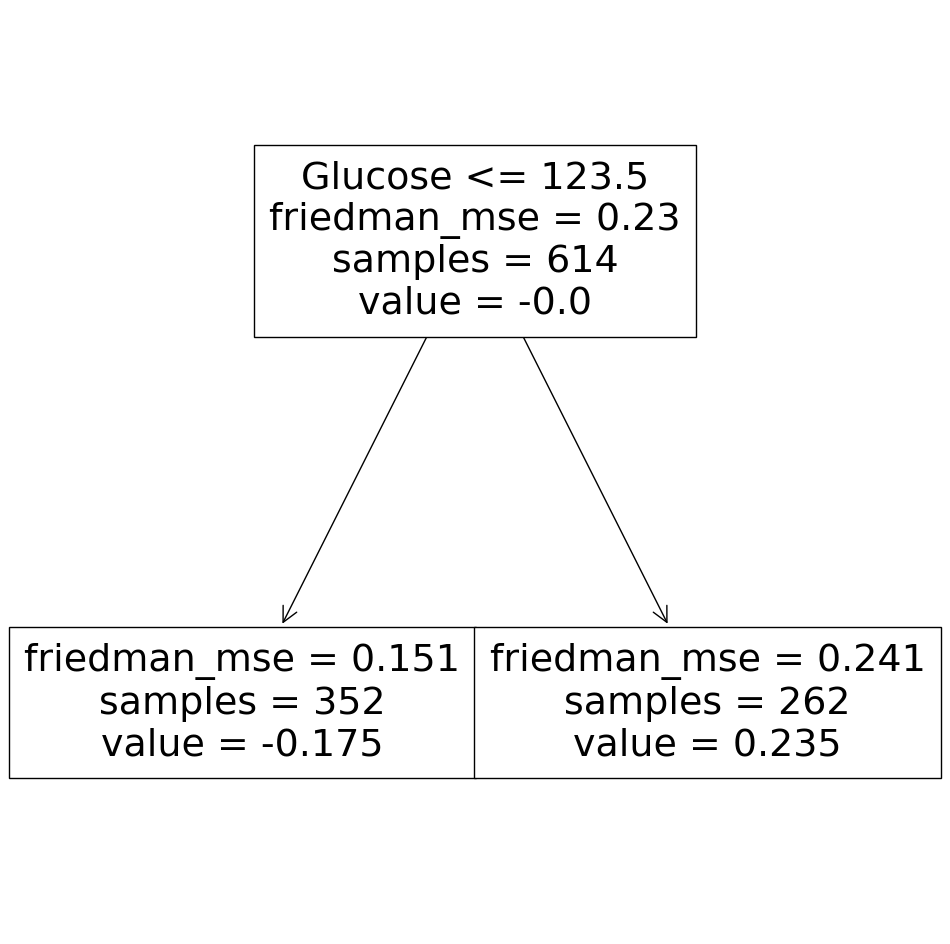

In [ ]:
ax = subplots(figsize=(12,12))[1]
plot_tree(boost.estimators_[0][0],
          feature_names=feature_names,
          ax=ax);

In [ ]:
num_estimators = np.arange(1, 1000, 50)
num_depths = np.arange(1,5,1)
num_learning_rate = np.arange(0.001,0.1,0.01)


param_grid = {'n_estimators': num_estimators,
        'max_depth': num_depths,
        'learning_rate': num_learning_rate
        }

boost = GBR(learning_rate=0.02,
            max_depth=1,
            random_state=123)

kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)

grid = skm.GridSearchCV(boost,
                        param_grid,
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')

G = grid.fit(X_train, y_train)

best_ = grid.best_estimator_
print(grid.best_params_, np.mean((y_test - best_.predict(X_test))**2))

{'learning_rate': 0.09099999999999998, 'max_depth': 2, 'n_estimators': 51} 0.1403051099604759


##Comparison and Conclusion

In [ ]:
comp = pd.DataFrame()

comp['Model Name'] = ['OLS', 'Best Subset Selection', 'Forward Selection', 'PCR', 'PLS', 'Ridge', 'Lasso', 'Decision Tree', 'Random Forest', 'Boosting']
comp['Train MSE'] = [ols_train_mse, bes_train_mse, for_train_mse, pcr_train_mse, pls_train_mse, rid_train_mse, las_train_mse, dec_train_mse, ran_train_mse, boo_train_mse]
comp['Test MSE'] = [ols_test_mse, bes_test_mse, for_test_mse, pcr_test_mse, pls_test_mse, rid_test_mse, las_test_mse, dec_test_mse, ran_test_mse, boo_test_mse]

print(comp)

              Model Name  Train MSE  Test MSE
0                    OLS   0.158582  0.139211
1  Best Subset Selection   0.180736  0.166070
2      Forward Selection   0.180736  0.166070
3                    PCR   0.175668  0.143871
4                    PLS   0.158610  0.139239
5                  Ridge   0.158949  0.138739
6                  Lasso   0.160175  0.139216
7          Decision Tree   0.158212  0.152995
8          Random Forest   0.023262  0.141061
9               Boosting   0.135562  0.135925


In [ ]:
styled_comp = comp.style.format({
    'Train MSE': '{:.4f}',
    'Test MSE': '{:.4f}',
})

styled_comp = styled_comp.background_gradient(cmap='coolwarm', subset=['Train MSE', 'Test MSE'])

styled_comp = styled_comp.set_table_styles([{
    'selector': 'th',
    'props': [('font-weight', 'bold')]
}])

styled_comp

,Model Name,Train MSE,Test MSE
0,OLS,0.1586,0.1392
1,Best Subset Selection,0.1807,0.1661
2,Forward Selection,0.1807,0.1661
3,PCR,0.1757,0.1439
4,PLS,0.1586,0.1392
5,Ridge,0.1589,0.1387
6,Lasso,0.1602,0.1392
7,Decision Tree,0.1582,0.1530
8,Random Forest,0.0233,0.1411
9,Boosting,0.1356,0.1359


就决定是你了！Random Forest!

#Apply with Age Classification

##Age classifiers

In [ ]:
print("Number of zero skin thickness:", sum(df['SkinThickness']==0))

Number of zero skin thickness: 0


Age Classification according to WHO

In [ ]:
categories = np.where(data['Age'] < 25, 'Youth',
                      np.where(data['Age'] < 45, 'Young',
                               np.where(data['Age'] < 61, 'Middle',
                                        'Elder')))

In [ ]:
df['AgeClassification'] = categories

In [ ]:
dummies = pd.get_dummies(df[['AgeClassification']])

In [ ]:
dummies

,AgeClassification_Elder,AgeClassification_Middle,AgeClassification_Young,AgeClassification_Youth
0,False,True,False,False
1,False,False,True,False
2,False,False,True,False
3,False,False,False,True
4,False,False,True,False
...,...,...,...,...
763,True,False,False,False
764,False,False,True,False
765,False,False,True,False
766,False,True,False,False


In [ ]:
df = df.drop(['AgeClassification'], axis=1).astype('float64')

df = pd.concat([df, dummies], axis=1).astype(float)

##Data Division by Age Classifier

In [ ]:
df_youth = df[df['AgeClassification_Youth'] == 1]
df_young = df[df['AgeClassification_Young'] == 1]
df_middle = df[df['AgeClassification_Middle'] == 1]
df_elder = df[df['AgeClassification_Elder'] == 1]
print(df_youth.shape, df_young.shape, df_middle.shape, df_elder.shape)

(219, 13) (416, 13) (106, 13) (27, 13)


In [ ]:
df_youth_train, df_youth_test = train_test_split(df_youth, test_size=0.2, random_state=0)
df_young_train, df_young_test = train_test_split(df_young, test_size=0.2, random_state=0)
df_middle_train, df_middle_test = train_test_split(df_middle, test_size=0.2, random_state=0)
df_elder_train, df_elder_test = train_test_split(df_elder, test_size=0.2, random_state=0)

In [ ]:
y_youth_train = df_youth_train['Outcome']
X_youth_train = df_youth_train.drop(['Outcome'], axis = 1).astype('float64')
y_youth_test = df_youth_test['Outcome']
X_youth_test = df_youth_test.drop(['Outcome'], axis = 1).astype('float64')

X_youth_train = sm.add_constant(X_youth_train)
X_youth_test = sm.add_constant(X_youth_test)

In [ ]:
y_young_train = df_young_train['Outcome']
X_young_train = df_young_train.drop(['Outcome'], axis = 1).astype('float64')
y_young_test = df_young_test['Outcome']
X_young_test = df_young_test.drop(['Outcome'], axis = 1).astype('float64')

X_young_train = sm.add_constant(X_young_train)
X_young_test = sm.add_constant(X_young_test)

In [ ]:
y_middle_train = df_middle_train['Outcome']
X_middle_train = df_middle_train.drop(['Outcome'], axis = 1).astype('float64')
y_middle_test = df_middle_test['Outcome']
X_middle_test = df_middle_test.drop(['Outcome'], axis = 1).astype('float64')

X_middle_train = sm.add_constant(X_middle_train)
X_middle_test = sm.add_constant(X_middle_test)

In [ ]:
y_elder_train = df_elder_train['Outcome']
X_elder_train = df_elder_train.drop(['Outcome'], axis = 1).astype('float64')
y_elder_test = df_elder_test['Outcome']
X_elder_test = df_elder_test.drop(['Outcome'], axis = 1).astype('float64')

X_elder_train = sm.add_constant(X_elder_train)
X_elder_test = sm.add_constant(X_elder_test)

##Random Forest with youth

In [ ]:
X_train = X_youth_train
y_train = y_youth_train
X_test = X_youth_test
y_test = y_youth_test

In [ ]:
X_train = X_train.drop(['AgeClassification_Elder','AgeClassification_Middle','AgeClassification_Young','AgeClassification_Youth'], axis=1).astype('float64')
X_test = X_test.drop(['AgeClassification_Elder','AgeClassification_Middle','AgeClassification_Young','AgeClassification_Youth'], axis=1).astype('float64')

In [ ]:
train_errs = list()
test_errs = list()
for m in range(3,14):
    rf = RF(max_features=m, random_state=123).fit(X_train, y_train)

    y_train_pred_RF = rf.predict(X_train)
    train_err = np.mean((y_train - y_train_pred_RF)**2)

    y_test_pred_RF = rf.predict(X_test)
    test_err = np.mean((y_test - y_test_pred_RF)**2)

    feature_imp = pd.DataFrame({'importance':rf.feature_importances_}, index=feature_names)
    feature_imp_sorted =feature_imp.sort_values(by='importance', ascending=False)
    top_features = feature_imp_sorted.index.tolist()

    print('For m is', m, 'Train MSE:', train_err, 'Test MSE:', test_err, 'Top features are:', top_features)
    train_errs.append(train_err)
    test_errs.append(test_err)

For m is 3 Train MSE: 0.01626342857142857 Test MSE: 0.09607045454545453 Top features are: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness', 'BloodPressure', 'Pregnancies', 'Insulin', 'Age']
For m is 4 Train MSE: 0.015478285714285712 Test MSE: 0.10402954545454542 Top features are: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'BloodPressure', 'SkinThickness', 'Pregnancies', 'Insulin', 'Age']
For m is 5 Train MSE: 0.016548 Test MSE: 0.10245454545454545 Top features are: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness', 'Pregnancies', 'BloodPressure', 'Insulin', 'Age']
For m is 6 Train MSE: 0.01618057142857143 Test MSE: 0.10048636363636367 Top features are: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness', 'Pregnancies', 'BloodPressure', 'Insulin', 'Age']
For m is 7 Train MSE: 0.016441714285714285 Test MSE: 0.10646818181818181 Top features are: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Pregnancies', 'BloodPressure', 'SkinThickness', 'Insuli

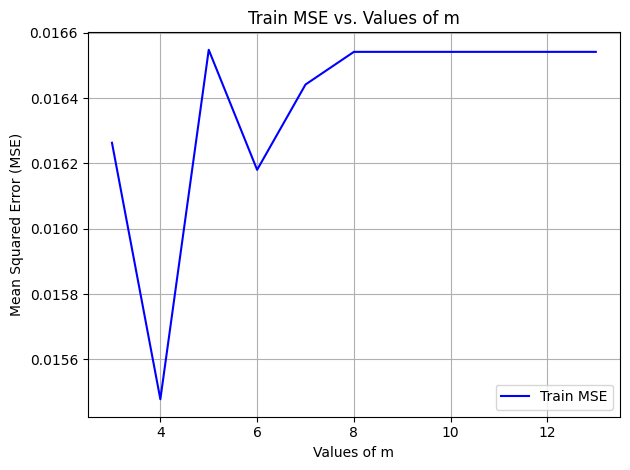

In [ ]:
plt.plot(range(3, 14), train_errs, color='blue', label='Train MSE')

plt.xlabel('Values of m')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Train MSE vs. Values of m')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()

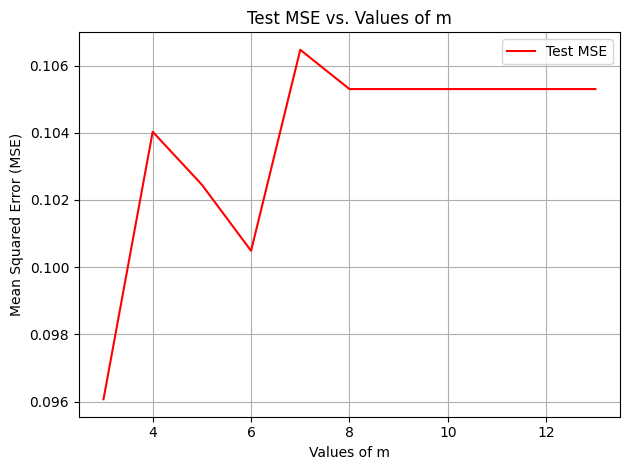

In [ ]:
plt.plot(range(3, 14), test_errs, color='red', label='Test MSE')

plt.xlabel('Values of m')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Test MSE vs. Values of m')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
top_features_youth_m3 = ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'BloodPressure', 'SkinThickness', 'Pregnancies', 'Insulin', 'Age']

##Random Forest with young

In [ ]:
X_train = X_young_train
y_train = y_young_train
X_test = X_young_test
y_test = y_young_test

In [ ]:
X_train = X_train.drop(['AgeClassification_Elder','AgeClassification_Middle','AgeClassification_Young','AgeClassification_Youth'], axis=1).astype('float64')
X_test = X_test.drop(['AgeClassification_Elder','AgeClassification_Middle','AgeClassification_Young','AgeClassification_Youth'], axis=1).astype('float64')

In [ ]:
train_errs = list()
test_errs = list()
for m in range(3,14):
    rf = RF(max_features=m, random_state=123).fit(X_train, y_train)

    y_train_pred_RF = rf.predict(X_train)
    train_err = np.mean((y_train - y_train_pred_RF)**2)

    y_test_pred_RF = rf.predict(X_test)
    test_err = np.mean((y_test - y_test_pred_RF)**2)

    feature_imp = pd.DataFrame({'importance':rf.feature_importances_}, index=feature_names)
    feature_imp_sorted =feature_imp.sort_values(by='importance', ascending=False)
    top_features = feature_imp_sorted.index.tolist()

    print('For m is', m, 'Train MSE:', train_err, 'Test MSE:', test_err, 'Top features are:', top_features)
    train_errs.append(train_err)
    test_errs.append(test_err)

For m is 3 Train MSE: 0.024667168674698797 Test MSE: 0.19012976190476194 Top features are: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure', 'SkinThickness', 'Pregnancies']
For m is 4 Train MSE: 0.025002409638554213 Test MSE: 0.19119642857142854 Top features are: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure', 'SkinThickness', 'Pregnancies']
For m is 5 Train MSE: 0.025171385542168672 Test MSE: 0.18620714285714285 Top features are: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure', 'SkinThickness', 'Pregnancies']
For m is 6 Train MSE: 0.02422198795180723 Test MSE: 0.1844059523809524 Top features are: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin', 'BloodPressure', 'SkinThickness', 'Pregnancies']
For m is 7 Train MSE: 0.025827409638554216 Test MSE: 0.18571071428571426 Top features are: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'BloodPressure', 'Insulin', 'Pregnanc

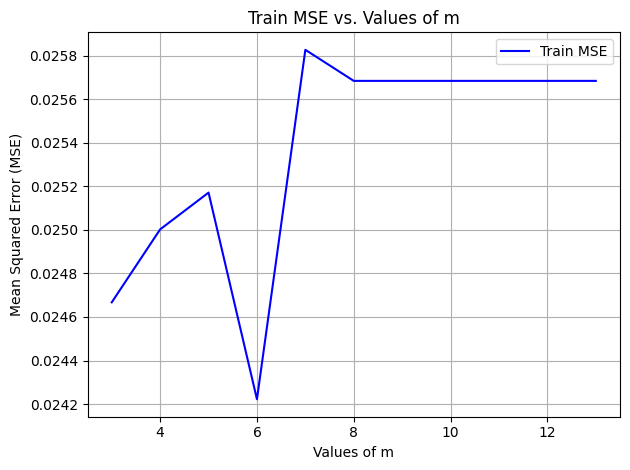

In [ ]:
plt.plot(range(3, 14), train_errs, color='blue', label='Train MSE')

plt.xlabel('Values of m')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Train MSE vs. Values of m')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()

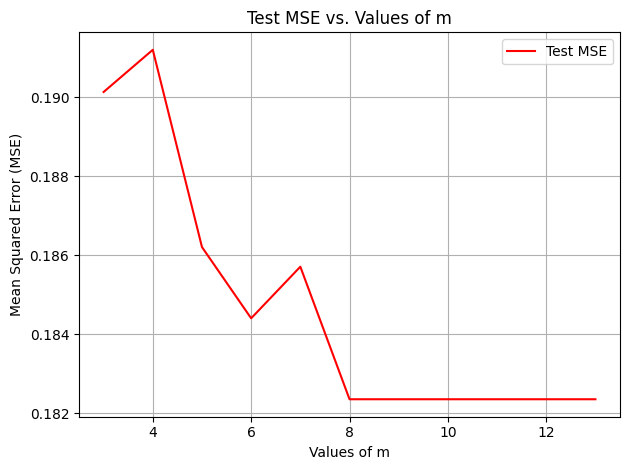

In [ ]:
plt.plot(range(3, 14), test_errs, color='red', label='Test MSE')

plt.xlabel('Values of m')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Test MSE vs. Values of m')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
top_features_young_m5 = ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'BloodPressure', 'Pregnancies', 'Insulin', 'SkinThickness']

##Random Forest with middle aged

In [ ]:
X_train = X_middle_train
y_train = y_middle_train
X_test = X_middle_test
y_test = y_middle_test

In [ ]:
X_train = X_train.drop(['AgeClassification_Elder','AgeClassification_Middle','AgeClassification_Young','AgeClassification_Youth'], axis=1).astype('float64')
X_test = X_test.drop(['AgeClassification_Elder','AgeClassification_Middle','AgeClassification_Young','AgeClassification_Youth'], axis=1).astype('float64')

In [ ]:
train_errs = list()
test_errs = list()
for m in range(3,14):
    rf = RF(max_features=m, random_state=123).fit(X_train, y_train)

    y_train_pred_RF = rf.predict(X_train)
    train_err = np.mean((y_train - y_train_pred_RF)**2)

    y_test_pred_RF = rf.predict(X_test)
    test_err = np.mean((y_test - y_test_pred_RF)**2)

    feature_imp = pd.DataFrame({'importance':rf.feature_importances_}, index=feature_names)
    feature_imp_sorted =feature_imp.sort_values(by='importance', ascending=False)
    top_features = feature_imp_sorted.index.tolist()

    print('For m is', m, 'Train MSE:', train_err, 'Test MSE:', test_err, 'Top features are:', top_features)
    train_errs.append(train_err)
    test_errs.append(test_err)

For m is 3 Train MSE: 0.033464285714285724 Test MSE: 0.18269545454545452 Top features are: ['Glucose', 'DiabetesPedigreeFunction', 'BMI', 'Age', 'Insulin', 'BloodPressure', 'Pregnancies', 'SkinThickness']
For m is 4 Train MSE: 0.03488809523809524 Test MSE: 0.16583181818181816 Top features are: ['Glucose', 'DiabetesPedigreeFunction', 'BMI', 'Insulin', 'Age', 'BloodPressure', 'Pregnancies', 'SkinThickness']
For m is 5 Train MSE: 0.03458214285714286 Test MSE: 0.1728090909090909 Top features are: ['Glucose', 'DiabetesPedigreeFunction', 'BMI', 'Age', 'Insulin', 'BloodPressure', 'Pregnancies', 'SkinThickness']
For m is 6 Train MSE: 0.03665119047619048 Test MSE: 0.18031363636363637 Top features are: ['Glucose', 'DiabetesPedigreeFunction', 'BMI', 'Insulin', 'Age', 'BloodPressure', 'Pregnancies', 'SkinThickness']
For m is 7 Train MSE: 0.03689166666666667 Test MSE: 0.16626818181818181 Top features are: ['Glucose', 'DiabetesPedigreeFunction', 'BMI', 'Insulin', 'Age', 'BloodPressure', 'Pregnancies

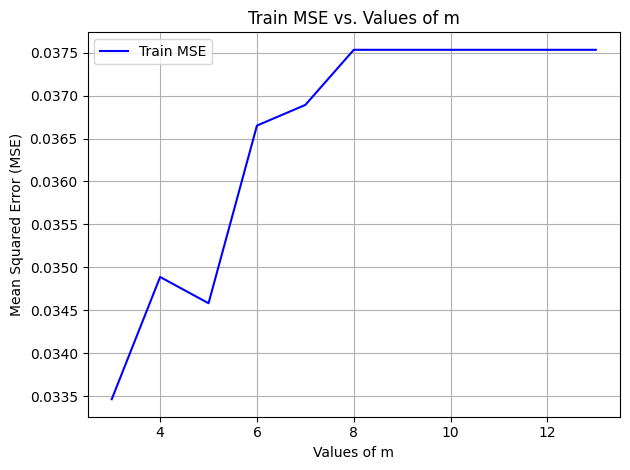

In [ ]:
plt.plot(range(3, 14), train_errs, color='blue', label='Train MSE')

plt.xlabel('Values of m')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Train MSE vs. Values of m')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()

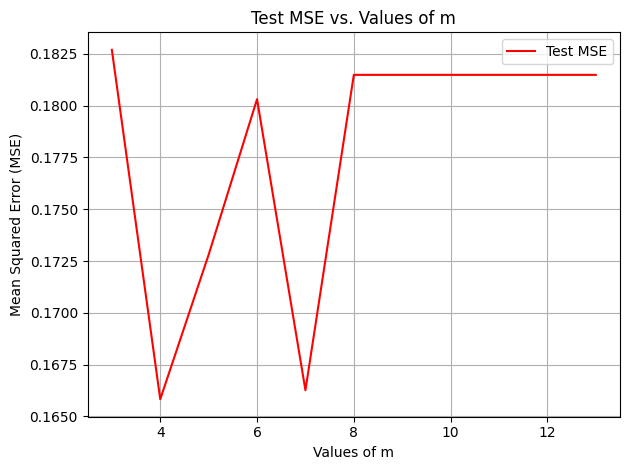

In [ ]:
plt.plot(range(3, 14), test_errs, color='red', label='Test MSE')

plt.xlabel('Values of m')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Test MSE vs. Values of m')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
top_features_middle_m4 = ['Glucose', 'DiabetesPedigreeFunction', 'BMI', 'Insulin', 'Age', 'BloodPressure', 'Pregnancies', 'SkinThickness']

##Random Forest with Elder

In [ ]:
X_train = X_elder_train
y_train = y_elder_train
X_test = X_elder_test
y_test = y_elder_test

In [ ]:
X_train = X_train.drop(['AgeClassification_Elder','AgeClassification_Middle','AgeClassification_Young','AgeClassification_Youth'], axis=1).astype('float64')
X_test = X_test.drop(['AgeClassification_Elder','AgeClassification_Middle','AgeClassification_Young','AgeClassification_Youth'], axis=1).astype('float64')

In [ ]:
train_errs = list()
test_errs = list()
for m in range(3,14):
    rf = RF(max_features=m, random_state=123).fit(X_train, y_train)

    y_train_pred_RF = rf.predict(X_train)
    train_err = np.mean((y_train - y_train_pred_RF)**2)

    y_test_pred_RF = rf.predict(X_test)
    test_err = np.mean((y_test - y_test_pred_RF)**2)

    feature_imp = pd.DataFrame({'importance':rf.feature_importances_}, index=feature_names)
    feature_imp_sorted =feature_imp.sort_values(by='importance', ascending=False)
    top_features = feature_imp_sorted.index.tolist()

    print('For m is', m, 'Train MSE:', train_err, 'Test MSE:', test_err, 'Top features are:', top_features)
    train_errs.append(train_err)
    test_errs.append(test_err)

For m is 3 Train MSE: 0.023442857142857144 Test MSE: 0.13638333333333333 Top features are: ['BMI', 'Glucose', 'Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age', 'SkinThickness', 'Insulin']
For m is 4 Train MSE: 0.022700000000000005 Test MSE: 0.1466333333333333 Top features are: ['Glucose', 'BMI', 'Pregnancies', 'BloodPressure', 'Age', 'DiabetesPedigreeFunction', 'SkinThickness', 'Insulin']
For m is 5 Train MSE: 0.02254285714285714 Test MSE: 0.14473333333333332 Top features are: ['BMI', 'Glucose', 'Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age', 'SkinThickness', 'Insulin']
For m is 6 Train MSE: 0.021933333333333336 Test MSE: 0.13725 Top features are: ['BMI', 'Glucose', 'BloodPressure', 'Pregnancies', 'DiabetesPedigreeFunction', 'Age', 'SkinThickness', 'Insulin']
For m is 7 Train MSE: 0.022895238095238094 Test MSE: 0.13863333333333333 Top features are: ['BMI', 'Glucose', 'Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age', 'SkinThickness', 

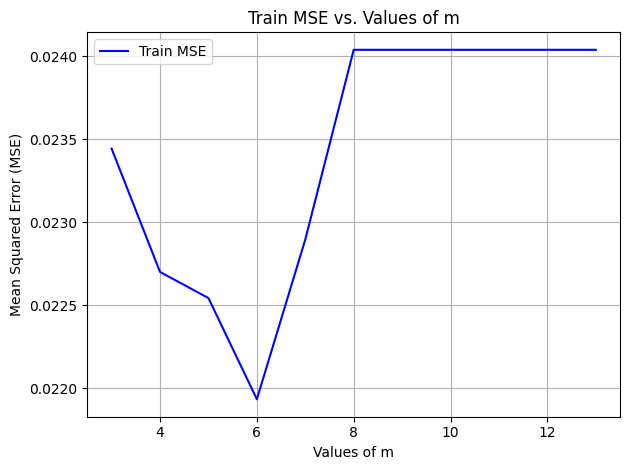

In [ ]:
plt.plot(range(3, 14), train_errs, color='blue', label='Train MSE')

plt.xlabel('Values of m')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Train MSE vs. Values of m')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()

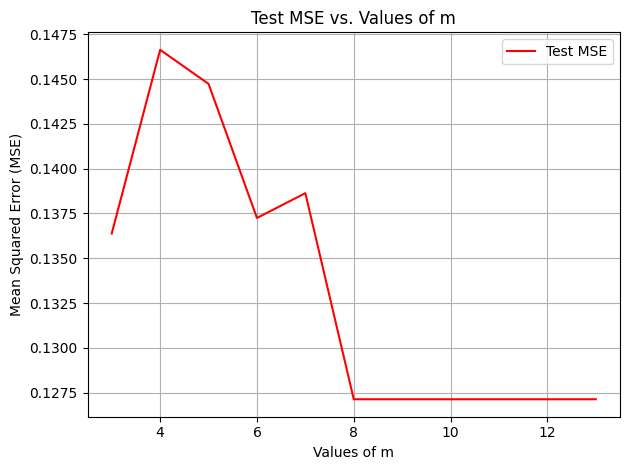

In [ ]:
plt.plot(range(3, 14), test_errs, color='red', label='Test MSE')

plt.xlabel('Values of m')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Test MSE vs. Values of m')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()

In [ ]:
top_features_elder_m7 = ['BMI', 'Glucose', 'Pregnancies', 'BloodPressure', 'DiabetesPedigreeFunction', 'Age', 'SkinThickness', 'Insulin']

##Random Forest Comparison and Conclusion

In [ ]:
rf_comp = pd.DataFrame()

rf_comp['Age Group'] = ['Youth (0-24)', 'Young (25-44)', 'Middle (45-60)', 'Elder (61-100)']
rf_comp['Top 1 feature'] = [top_features_youth_m3[0], top_features_young_m5[0], top_features_middle_m4[0], top_features_elder_m7[0]]
rf_comp['Top 2'] = [top_features_youth_m3[1], top_features_young_m5[1], top_features_middle_m4[1], top_features_elder_m7[1]]
rf_comp['Top 3'] = [top_features_youth_m3[2], top_features_young_m5[2], top_features_middle_m4[2], top_features_elder_m7[2]]
rf_comp['Top 4'] = [top_features_youth_m3[3], top_features_young_m5[3], top_features_middle_m4[3], top_features_elder_m7[3]]
rf_comp['Top 5'] = [top_features_youth_m3[4], top_features_young_m5[4], top_features_middle_m4[4], top_features_elder_m7[4]]
rf_comp['Top 6'] = [top_features_youth_m3[5], top_features_young_m5[5], top_features_middle_m4[5], top_features_elder_m7[5]]
rf_comp['Top 7'] = [top_features_youth_m3[6], top_features_young_m5[6], top_features_middle_m4[6], top_features_elder_m7[6]]

print(rf_comp)

        Age Group Top 1 feature                     Top 2  \
0    Youth (0-24)       Glucose                       BMI   
1   Young (25-44)       Glucose                       BMI   
2  Middle (45-60)       Glucose  DiabetesPedigreeFunction   
3  Elder (61-100)           BMI                   Glucose   

                      Top 3          Top 4                     Top 5  \
0  DiabetesPedigreeFunction  BloodPressure             SkinThickness   
1  DiabetesPedigreeFunction            Age             BloodPressure   
2                       BMI        Insulin                       Age   
3               Pregnancies  BloodPressure  DiabetesPedigreeFunction   

           Top 6          Top 7  
0    Pregnancies        Insulin  
1    Pregnancies        Insulin  
2  BloodPressure    Pregnancies  
3            Age  SkinThickness  


In [ ]:
styled_rf_comp = rf_comp.style.set_properties(**{'text-align': 'left'})

styled_rf_comp = styled_rf_comp.background_gradient(cmap='coolwarm')

styled_rf_comp = styled_rf_comp.set_table_styles([{
    'selector': 'th',
    'props': [('font-weight', 'bold')]
}])

styled_rf_comp

,Age Group,Top 1 feature,Top 2,Top 3,Top 4,Top 5,Top 6,Top 7
0,Youth (0-24),Glucose,BMI,DiabetesPedigreeFunction,BloodPressure,SkinThickness,Pregnancies,Insulin
1,Young (25-44),Glucose,BMI,DiabetesPedigreeFunction,Age,BloodPressure,Pregnancies,Insulin
2,Middle (45-60),Glucose,DiabetesPedigreeFunction,BMI,Insulin,Age,BloodPressure,Pregnancies
3,Elder (61-100),BMI,Glucose,Pregnancies,BloodPressure,DiabetesPedigreeFunction,Age,SkinThickness


#Old Work Saving spot

##OLS Regression

In [ ]:
#Youth
model = sm.OLS(y_youth_train, X_youth_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     8.126
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           3.06e-09
Time:                        15:38:20   Log-Likelihood:                -32.652
No. Observations:                 175   AIC:                             83.30
Df Residuals:                     166   BIC:                             111.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.0021      0.017      0.127      0.899      -0.031       0.035
Glucose                      0.0054      0.001      5.904      0.000       0.004       0.007
BloodPressure               -0.0026      0.001     -1.723      0.087      -0.006       0.000
SkinThickness                0.0020      0.003      0.670      0.504      -0.004       0.008
Insulin                     -0.0006      0.000     -2.359      0.020      -0.001   -9.18e-05
BMI                          0.0101      0.004      2.554      0.012       0.002       0.018
DiabetesPedigreeFunction     0.1419      0.086      1.657      0.099      -0.027       0.311
Age                          0.0061      0.022      0.272      0.786      -0.038       0.050
AgeClassification_Elder           0          0        nan        nan           0           0
AgeClassification_Middle          0          0        nan        nan           0           0
AgeClassification_Young           0          0        nan        nan           0           0
AgeClassification_Youth     -0.7982      0.496     -1.610      0.109      -1.777       0.180
==============================================================================
Omnibus:                       47.258   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.606
Skew:                           1.425   Prob(JB):                     1.41e-17
Kurtosis:                       4.588   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#Young
model = sm.OLS(y_young_train, X_young_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     19.77
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           3.01e-24
Time:                        15:38:29   Log-Likelihood:                -170.36
No. Observations:                 332   AIC:                             358.7
Df Residuals:                     323   BIC:                             393.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.0084      0.009      0.982      0.327      -0.008       0.025
Glucose                      0.0070      0.001      9.022      0.000       0.005       0.009
BloodPressure               -0.0021      0.001     -1.934      0.054      -0.004    3.59e-05
SkinThickness               -0.0033      0.003     -1.013      0.312      -0.010       0.003
Insulin                     -0.0004      0.000     -1.701      0.090      -0.001    6.04e-05
BMI                          0.0138      0.004      3.539      0.000       0.006       0.021
DiabetesPedigreeFunction     0.1456      0.064      2.281      0.023       0.020       0.271
Age                          0.0093      0.005      2.016      0.045       0.000       0.018
AgeClassification_Elder           0          0        nan        nan           0           0
AgeClassification_Middle          0          0        nan        nan           0           0
AgeClassification_Young     -1.0461      0.173     -6.064      0.000      -1.385      -0.707
AgeClassification_Youth           0          0        nan        nan           0           0
==============================================================================
Omnibus:                       12.511   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                9.166
Skew:                           0.295   Prob(JB):                       0.0102
Kurtosis:                       2.439   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#Middle
model = sm.OLS(y_middle_train, X_middle_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     2.694
Date:                Wed, 24 Apr 2024   Prob (F-statistic):             0.0116
Time:                        15:38:34   Log-Likelihood:                -49.493
No. Observations:                  84   AIC:                             117.0
Df Residuals:                      75   BIC:                             138.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.0100      0.015      0.678      0.500      -0.019       0.039
Glucose                      0.0054      0.002      2.945      0.004       0.002       0.009
BloodPressure               -0.0010      0.006     -0.171      0.865      -0.012       0.011
SkinThickness                0.0029      0.008      0.341      0.734      -0.014       0.020
Insulin                      0.0007      0.000      1.876      0.065   -4.33e-05       0.001
BMI                         -0.0003      0.010     -0.035      0.972      -0.020       0.020
DiabetesPedigreeFunction     0.0346      0.150      0.230      0.819      -0.265       0.334
Age                         -0.0220      0.011     -1.952      0.055      -0.044       0.000
AgeClassification_Elder           0          0        nan        nan           0           0
AgeClassification_Middle     0.8166      0.829      0.985      0.328      -0.835       2.468
AgeClassification_Young           0          0        nan        nan           0           0
AgeClassification_Youth           0          0        nan        nan           0           0
==============================================================================
Omnibus:                       22.361   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.229
Skew:                          -0.192   Prob(JB):                       0.0732
Kurtosis:                       1.839   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#Elder
model = sm.OLS(y_elder_train, X_elder_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     2.119
Date:                Wed, 24 Apr 2024   Prob (F-statistic):              0.116
Time:                        15:38:39   Log-Likelihood:                -3.8635
No. Observations:                  21   AIC:                             25.73
Df Residuals:                      12   BIC:                             35.13
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                 -0.0483      0.037     -1.315      0.213      -0.128       0.032
Glucose                      0.0062      0.003      2.173      0.050   -1.53e-05       0.012
BloodPressure                0.0090      0.010      0.884      0.394      -0.013       0.031
SkinThickness               -0.0015      0.006     -0.236      0.817      -0.016       0.013
Insulin                      0.0018      0.003      0.648      0.529      -0.004       0.008
BMI                          0.0319      0.026      1.249      0.235      -0.024       0.088
DiabetesPedigreeFunction     0.7340      0.490      1.499      0.160      -0.333       1.801
Age                          0.0046      0.022      0.209      0.838      -0.043       0.052
AgeClassification_Elder     -2.5671      1.629     -1.576      0.141      -6.117       0.983
AgeClassification_Middle          0          0        nan        nan           0           0
AgeClassification_Young           0          0        nan        nan           0           0
AgeClassification_Youth           0          0        nan        nan           0           0
==============================================================================
Omnibus:                        0.291   Durbin-Watson:                   2.228
Prob(Omnibus):                  0.864   Jarque-Bera (JB):                0.439
Skew:                           0.214   Prob(JB):                        0.803
Kurtosis:                       2.436   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##Best Subset Selection & Forward Selection

**Youth**

In [ ]:
X_train = X_youth_train
X_test = X_youth_test
y_train = y_youth_train
y_test = y_youth_test

In [ ]:
X_train = X_train.drop(['AgeClassification_Elder','AgeClassification_Middle','AgeClassification_Young','AgeClassification_Youth'], axis=1)
X_test = X_test.drop(['AgeClassification_Elder','AgeClassification_Middle','AgeClassification_Young','AgeClassification_Youth'], axis=1)

In [ ]:
def processSubset(feature_set):                   # regr: Regression Model          RSS: Risedual Sqared Sum
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_train[list(feature_set)]) - y_train) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [ ]:
def getBest(k):  # k is the number of predictors to do best selection

    tic = time.time()        # Set a timer

    results = []          # Collection of models and RSS

    for combo in itertools.combinations(X_train.columns, k):
        results.append(processSubset(combo))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)          # A nicer frame of results

    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]   # The best model

    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
import time
import itertools

In [ ]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(3,4):            # i can only be 3
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 56 models on 3 predictors in 0.1575322151184082 seconds.
Total elapsed time: 0.15970516204833984 seconds.


In [ ]:
print(models_best.loc[3, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.320
Model:                            OLS   Adj. R-squared (uncentered):              0.308
Method:                 Least Squares   F-statistic:                              27.00
Date:                Wed, 24 Apr 2024   Prob (F-statistic):                    2.33e-14
Time:                        16:02:09   Log-Likelihood:                         -40.712
No. Observations:                 175   AIC:                                      87.42
Df Residuals:                     172   BIC:                                      96.92
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
best_model_bss = models_best.loc[3, "model"]
features = ['Glucose','SkinThickness','Age']

In [ ]:
X_train_bss = X_train[features]
train_pred = best_model_bss.predict(X_train_bss)
print('Training MSE:', np.mean((y_train - train_pred)**2))

Training MSE: 0.09323865672928418


In [ ]:
X_test_bss = X_test[features]
test_pred = best_model_bss.predict(X_test_bss)
print('Test MSE:', np.mean((y_test - test_pred)**2))

Test MSE: 0.11125825606394936


In [ ]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]

    tic = time.time()

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,4):
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  8 models on 1 predictors in 0.08233141899108887 seconds.
Processed  7 models on 2 predictors in 0.07007408142089844 seconds.
Processed  6 models on 3 predictors in 0.07018160820007324 seconds.
Total elapsed time: 0.2622995376586914 seconds.


In [ ]:
print(models_fwd.loc[3, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.320
Model:                            OLS   Adj. R-squared (uncentered):              0.308
Method:                 Least Squares   F-statistic:                              27.00
Date:                Wed, 24 Apr 2024   Prob (F-statistic):                    2.33e-14
Time:                        16:02:59   Log-Likelihood:                         -40.712
No. Observations:                 175   AIC:                                      87.42
Df Residuals:                     172   BIC:                                      96.92
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
best_model_fwd = models_fwd.loc[3, "model"]
features = ['Glucose','Age','SkinThickness']

In [ ]:
X_train_fwd = X_train[features]
#X_train_fwd_with_intercept = sm.add_constant(X_train_fwd)
train_pred = best_model_fwd.predict(X_train_fwd)
print('Training MSE:', np.mean((y_train - train_pred)**2))

Training MSE: 0.09323865672928422


In [ ]:
X_test_fwd = X_test[features]
#X_test_fwd_with_intercept = sm.add_constant(X_test_fwd)
test_pred = best_model_fwd.predict(X_test_fwd)
print('Test MSE:', np.mean((y_test - test_pred)**2))

Test MSE: 0.11125825606394933


Young

In [ ]:
X_train = X_young_train
X_test = X_young_test
y_train = y_young_train
y_test = y_young_test

In [ ]:
X_train = X_train.drop(['AgeClassification_Elder','AgeClassification_Middle','AgeClassification_Young','AgeClassification_Youth'], axis=1)
X_test = X_test.drop(['AgeClassification_Elder','AgeClassification_Middle','AgeClassification_Young','AgeClassification_Youth'], axis=1)

In [ ]:
def processSubset(feature_set):                   # regr: Regression Model          RSS: Risedual Sqared Sum
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_train[list(feature_set)]) - y_train) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [ ]:
def getBest(k):  # k is the number of predictors to do best selection

    tic = time.time()        # Set a timer

    results = []          # Collection of models and RSS

    for combo in itertools.combinations(X_train.columns, k):
        results.append(processSubset(combo))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)          # A nicer frame of results

    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]   # The best model

    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
import time
import itertools

In [ ]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(3,4):            # i can only be 3
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 56 models on 3 predictors in 0.20579051971435547 seconds.
Total elapsed time: 0.21406006813049316 seconds.


In [ ]:
print(models_best.loc[3, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.549
Model:                            OLS   Adj. R-squared (uncentered):              0.545
Method:                 Least Squares   F-statistic:                              133.7
Date:                Wed, 24 Apr 2024   Prob (F-statistic):                    1.25e-56
Time:                        16:05:16   Log-Likelihood:                         -194.26
No. Observations:                 332   AIC:                                      394.5
Df Residuals:                     329   BIC:                                      405.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [ ]:
best_model_bss = models_best.loc[3, "model"]
features = ['Glucose','BloodPressure','DiabetesPedigreeFunction']

In [ ]:
X_train_bss = X_train[features]
train_pred = best_model_bss.predict(X_train_bss)
print('Training MSE:', np.mean((y_train - train_pred)**2))

Training MSE: 0.18869565800851368


In [ ]:
X_test_bss = X_test[features]
test_pred = best_model_bss.predict(X_test_bss)
print('Test MSE:', np.mean((y_test - test_pred)**2))

Test MSE: 0.22132198396254552


In [ ]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]

    tic = time.time()

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,4):
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  8 models on 1 predictors in 0.026605844497680664 seconds.
Processed  7 models on 2 predictors in 0.017752408981323242 seconds.
Processed  6 models on 3 predictors in 0.018352508544921875 seconds.
Total elapsed time: 0.07893180847167969 seconds.


In [ ]:
print(models_fwd.loc[3, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.549
Model:                            OLS   Adj. R-squared (uncentered):              0.545
Method:                 Least Squares   F-statistic:                              133.7
Date:                Wed, 24 Apr 2024   Prob (F-statistic):                    1.25e-56
Time:                        16:06:12   Log-Likelihood:                         -194.26
No. Observations:                 332   AIC:                                      394.5
Df Residuals:                     329   BIC:                                      405.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

In [ ]:
best_model_fwd = models_fwd.loc[3, "model"]
features = ['Glucose','BloodPressure','DiabetesPedigreeFunction']

In [ ]:
X_train_fwd = X_train[features]
#X_train_fwd_with_intercept = sm.add_constant(X_train_fwd)
train_pred = best_model_fwd.predict(X_train_fwd)
print('Training MSE:', np.mean((y_train - train_pred)**2))

Training MSE: 0.18869565800851368


In [ ]:
X_test_fwd = X_test[features]
#X_test_fwd_with_intercept = sm.add_constant(X_test_fwd)
test_pred = best_model_fwd.predict(X_test_fwd)
print('Test MSE:', np.mean((y_test - test_pred)**2))

Test MSE: 0.22132198396254552


Middle

In [ ]:
X_train = X_middle_train
X_test = X_middle_test
y_train = y_middle_train
y_test = y_middle_test

In [ ]:
X_train = X_train.drop(['AgeClassification_Elder','AgeClassification_Middle','AgeClassification_Young','AgeClassification_Youth'], axis=1)
X_test = X_test.drop(['AgeClassification_Elder','AgeClassification_Middle','AgeClassification_Young','AgeClassification_Youth'], axis=1)

In [ ]:
def processSubset(feature_set):                   # regr: Regression Model          RSS: Risedual Sqared Sum
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_train[list(feature_set)]) - y_train) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [ ]:
def getBest(k):  # k is the number of predictors to do best selection

    tic = time.time()        # Set a timer

    results = []          # Collection of models and RSS

    for combo in itertools.combinations(X_train.columns, k):
        results.append(processSubset(combo))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)          # A nicer frame of results

    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]   # The best model

    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
import time
import itertools

In [ ]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(3,4):            # i can only be 3
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 56 models on 3 predictors in 0.1268606185913086 seconds.
Total elapsed time: 0.13247370719909668 seconds.


In [ ]:
print(models_best.loc[3, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.651
Model:                            OLS   Adj. R-squared (uncentered):              0.638
Method:                 Least Squares   F-statistic:                              50.37
Date:                Wed, 24 Apr 2024   Prob (F-statistic):                    1.79e-18
Time:                        16:08:30   Log-Likelihood:                         -51.470
No. Observations:                  84   AIC:                                      108.9
Df Residuals:                      81   BIC:                                      116.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
best_model_bss = models_best.loc[3, "model"]
features = ['Glucose','Insulin','Age']

In [ ]:
X_train_bss = X_train[features]
train_pred = best_model_bss.predict(X_train_bss)
print('Training MSE:', np.mean((y_train - train_pred)**2))

Training MSE: 0.1994075588967724


In [ ]:
X_test_bss = X_test[features]
test_pred = best_model_bss.predict(X_test_bss)
print('Test MSE:', np.mean((y_test - test_pred)**2))

Test MSE: 0.18298087860627457


In [ ]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]

    tic = time.time()

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,4):
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  8 models on 1 predictors in 0.02914881706237793 seconds.
Processed  7 models on 2 predictors in 0.034746646881103516 seconds.
Processed  6 models on 3 predictors in 0.025041580200195312 seconds.
Total elapsed time: 0.10115504264831543 seconds.


In [ ]:
print(models_fwd.loc[3, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.651
Model:                            OLS   Adj. R-squared (uncentered):              0.638
Method:                 Least Squares   F-statistic:                              50.37
Date:                Wed, 24 Apr 2024   Prob (F-statistic):                    1.79e-18
Time:                        16:09:05   Log-Likelihood:                         -51.470
No. Observations:                  84   AIC:                                      108.9
Df Residuals:                      81   BIC:                                      116.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
best_model_fwd = models_fwd.loc[3, "model"]
features = ['Glucose','Insulin','Age']

In [ ]:
X_train_fwd = X_train[features]
#X_train_fwd_with_intercept = sm.add_constant(X_train_fwd)
train_pred = best_model_fwd.predict(X_train_fwd)
print('Training MSE:', np.mean((y_train - train_pred)**2))

Training MSE: 0.1994075588967724


In [ ]:
X_test_fwd = X_test[features]
#X_test_fwd_with_intercept = sm.add_constant(X_test_fwd)
test_pred = best_model_fwd.predict(X_test_fwd)
print('Test MSE:', np.mean((y_test - test_pred)**2))

Test MSE: 0.18298087860627457


Elder

In [ ]:
X_train = X_elder_train
X_test = X_elder_test
y_train = y_elder_train
y_test = y_elder_test

In [ ]:
X_train = X_train.drop(['AgeClassification_Elder','AgeClassification_Middle','AgeClassification_Young','AgeClassification_Youth'], axis=1)
X_test = X_test.drop(['AgeClassification_Elder','AgeClassification_Middle','AgeClassification_Young','AgeClassification_Youth'], axis=1)

In [ ]:
def processSubset(feature_set):                   # regr: Regression Model          RSS: Risedual Sqared Sum
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_train[list(feature_set)]) - y_train) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [ ]:
def getBest(k):  # k is the number of predictors to do best selection

    tic = time.time()        # Set a timer

    results = []          # Collection of models and RSS

    for combo in itertools.combinations(X_train.columns, k):
        results.append(processSubset(combo))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)          # A nicer frame of results

    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]   # The best model

    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
import time
import itertools

In [ ]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(3,4):            # i can only be 3
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 56 models on 3 predictors in 0.2189018726348877 seconds.
Total elapsed time: 0.22170400619506836 seconds.


In [ ]:
print(models_best.loc[3, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.525
Model:                            OLS   Adj. R-squared (uncentered):              0.446
Method:                 Least Squares   F-statistic:                              6.644
Date:                Wed, 24 Apr 2024   Prob (F-statistic):                     0.00325
Time:                        16:10:23   Log-Likelihood:                         -8.8166
No. Observations:                  21   AIC:                                      23.63
Df Residuals:                      18   BIC:                                      26.77
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
best_model_bss = models_best.loc[3, "model"]
features = ['Glucose','BMI','Age']

In [ ]:
X_train_bss = X_train[features]
train_pred = best_model_bss.predict(X_train_bss)
print('Training MSE:', np.mean((y_train - train_pred)**2))

Training MSE: 0.13557919109727679


In [ ]:
X_test_bss = X_test[features]
test_pred = best_model_bss.predict(X_test_bss)
print('Test MSE:', np.mean((y_test - test_pred)**2))

Test MSE: 0.259285084780361


In [ ]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]

    tic = time.time()

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,4):
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  8 models on 1 predictors in 0.02956104278564453 seconds.
Processed  7 models on 2 predictors in 0.03349184989929199 seconds.
Processed  6 models on 3 predictors in 0.029254674911499023 seconds.
Total elapsed time: 0.10589122772216797 seconds.


In [ ]:
print(models_fwd.loc[3, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.470
Model:                            OLS   Adj. R-squared (uncentered):              0.381
Method:                 Least Squares   F-statistic:                              5.316
Date:                Wed, 24 Apr 2024   Prob (F-statistic):                     0.00843
Time:                        16:10:39   Log-Likelihood:                         -9.9822
No. Observations:                  21   AIC:                                      25.96
Df Residuals:                      18   BIC:                                      29.10
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [ ]:
best_model_fwd = models_fwd.loc[3, "model"]
features = ['Glucose','Pregnancies','BMI']

In [ ]:
X_train_fwd = X_train[features]
#X_train_fwd_with_intercept = sm.add_constant(X_train_fwd)
train_pred = best_model_fwd.predict(X_train_fwd)
print('Training MSE:', np.mean((y_train - train_pred)**2))

Training MSE: 0.15149728804728196


In [ ]:
X_test_fwd = X_test[features]
#X_test_fwd_with_intercept = sm.add_constant(X_test_fwd)
test_pred = best_model_fwd.predict(X_test_fwd)
print('Test MSE:', np.mean((y_test - test_pred)**2))

Test MSE: 0.0847867522600742


##Middle

##Elder

##Old Works

In [ ]:
df = data

In [ ]:
y_train = df_train['Outcome']
X_train = df_train.drop(['Outcome'], axis = 1).astype('float64')
y_test = df_test['Outcome']
X_test = df_test.drop(['Outcome'], axis = 1).astype('float64')

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

In [ ]:
X_train.head()

,const,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,1.0,7.0,150.0,78.0,29.0,126.0,35.2,0.692,54.0
118,1.0,4.0,97.0,60.0,23.0,0.0,28.2,0.443,22.0
247,1.0,0.0,165.0,90.0,33.0,680.0,52.3,0.427,23.0
157,1.0,1.0,109.0,56.0,21.0,135.0,25.2,0.833,23.0
468,1.0,8.0,120.0,0.0,0.0,0.0,30.0,0.183,38.0


In [ ]:
X_test

,const,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
661,1.0,1.0,199.0,76.0,43.0,0.0,42.9,1.394,22.0
122,1.0,2.0,107.0,74.0,30.0,100.0,33.6,0.404,23.0
113,1.0,4.0,76.0,62.0,0.0,0.0,34.0,0.391,25.0
14,1.0,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0
529,1.0,0.0,111.0,65.0,0.0,0.0,24.6,0.660,31.0
...,...,...,...,...,...,...,...,...,...
476,1.0,2.0,105.0,80.0,45.0,191.0,33.7,0.711,29.0
482,1.0,4.0,85.0,58.0,22.0,49.0,27.8,0.306,28.0
230,1.0,4.0,142.0,86.0,0.0,0.0,44.0,0.645,22.0
527,1.0,3.0,116.0,74.0,15.0,105.0,26.3,0.107,24.0


In [ ]:
y_train

603    1
118    0
247    0
157    0
468    1
      ..
763    0
192    1
629    0
559    0
684    0
Name: Outcome, Length: 614, dtype: int64

In [ ]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64

In [ ]:
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Outcome   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     31.67
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           1.39e-41
Time:                        16:15:30   Log-Likelihood:                -313.17
No. Observations:                 614   AIC:                             644.3
Df Residuals:                     605   BIC:                             684.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8582      0.097     -8.850      0.000      -1.049      -0.668
Pregnancies                  0.0157      0.006      2.756      0.006       0.004       0.027
Glucose                      0.0059      0.001      9.887      0.000       0.005       0.007
BloodPressure               -0.0025      0.001     -2.736      0.006      -0.004      -0.001
SkinThickness                0.0007      0.001      0.583      0.560      -0.002       0.003
Insulin                     -0.0002      0.000     -1.385      0.167      -0.001    9.61e-05
BMI                          0.0136      0.002      5.748      0.000       0.009       0.018
DiabetesPedigreeFunction     0.1424      0.051      2.797      0.005       0.042       0.242
Age                          0.0036      0.002      2.055      0.040       0.000       0.007
==============================================================================
Omnibus:                       40.222   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.745
Skew:                           0.389   Prob(JB):                     1.56e-06
Kurtosis:                       2.336   Cond. No.                     1.11e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
X_train = X_train.drop(['const'], axis=1)
X_test = X_test.drop(['const'], axis=1)

In [ ]:
def processSubset(feature_set):                   # regr: Regression Model          RSS: Risedual Sqared Sum
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_train,X_train[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_train[list(feature_set)]) - y_train) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [ ]:
def getBest(k):  # k is the number of predictors to do best selection

    tic = time.time()        # Set a timer

    results = []          # Collection of models and RSS

    for combo in itertools.combinations(X_train.columns, k):
        results.append(processSubset(combo))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)          # A nicer frame of results

    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]   # The best model

    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
import time
import itertools

In [ ]:
models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(3,4):            # i can only be 3
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 56 models on 3 predictors in 0.1870861053466797 seconds.
Total elapsed time: 0.1926267147064209 seconds.


In [ ]:
print(models_best.loc[3, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.481
Model:                            OLS   Adj. R-squared (uncentered):              0.479
Method:                 Least Squares   F-statistic:                              188.9
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    1.19e-86
Time:                        16:15:39   Log-Likelihood:                         -356.07
No. Observations:                 614   AIC:                                      718.1
Df Residuals:                     611   BIC:                                      731.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
best_model_bss = models_best.loc[3, "model"]
features = ['Pregnancies','Glucose','BloodPressure']

In [ ]:
X_train_bss = X_train[features]
train_pred = best_model_bss.predict(X_train_bss)
print('Training MSE:', np.mean((y_train - train_pred)**2))

Training MSE: 0.18674105735770222


In [ ]:
X_test_bss = X_test[features]
test_pred = best_model_bss.predict(X_test_bss)
print('Test MSE:', np.mean((y_test - test_pred)**2))

Test MSE: 0.16418529481809122


In [ ]:
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_train.columns if p not in predictors]

    tic = time.time()

    results = []

    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))

    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]

    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")

    # Return the best model, along with some other useful information about the model
    return best_model

In [ ]:
models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,4):
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  8 models on 1 predictors in 0.0284273624420166 seconds.
Processed  7 models on 2 predictors in 0.025882720947265625 seconds.
Processed  6 models on 3 predictors in 0.02068924903869629 seconds.
Total elapsed time: 0.09041428565979004 seconds.


In [ ]:
print(models_fwd.loc[3, "model"].summary())

                                 OLS Regression Results                                
Dep. Variable:                Outcome   R-squared (uncentered):                   0.481
Model:                            OLS   Adj. R-squared (uncentered):              0.479
Method:                 Least Squares   F-statistic:                              188.9
Date:                Mon, 22 Apr 2024   Prob (F-statistic):                    1.19e-86
Time:                        16:15:46   Log-Likelihood:                         -356.07
No. Observations:                 614   AIC:                                      718.1
Df Residuals:                     611   BIC:                                      731.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
best_model_fwd = models_fwd.loc[3, "model"]
features = ['Glucose','BloodPressure','Pregnancies']

In [ ]:
X_train_fwd = X_train[features]
#X_train_fwd_with_intercept = sm.add_constant(X_train_fwd)
train_pred = best_model_fwd.predict(X_train_fwd)
print('Training MSE:', np.mean((y_train - train_pred)**2))

Training MSE: 0.1867410573577022


In [ ]:
X_test_fwd = X_test[features]
#X_test_fwd_with_intercept = sm.add_constant(X_test_fwd)
test_pred = best_model_fwd.predict(X_test_fwd)
print('Test MSE:', np.mean((y_test - test_pred)**2))

Test MSE: 0.16418529481809124


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler(with_std=True, with_mean=True)
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
pca = PCA()
pca.fit(X_train_scaled)

PCA()

In [ ]:
pca = PCA(n_components=3)
scaler = StandardScaler(with_mean=True, with_std=True)
lin_reg = LinearRegression()
pipe = Pipeline([('scaler', scaler), ('pca', pca), ('lin_reg', lin_reg)])    # Apply PCR
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=3)),
                ('lin_reg', LinearRegression())])

In [ ]:
pipe.named_steps['lin_reg'].coef_

array([0.1203723 , 0.08214463, 0.08352707])

In [ ]:
train_pred = pipe.predict(X_train)
test_pred = pipe.predict(X_test)
print('Training MSE:', np.mean((y_train - train_pred)**2))
print('Test MSE:', np.mean((y_test - test_pred)**2))

Training MSE: 0.1813010759143802
Test MSE: 0.15568868645834372


In [ ]:
from sklearn.cross_decomposition import PLSRegression

In [ ]:
pls = PLSRegression(n_components=3,
                   scale=True)
pls.fit(X_train, y_train)

PLSRegression(n_components=3)

In [ ]:
train_pred = pls.predict(X_train).reshape(-1)
print('Training MSE:', np.mean((train_pred - y_train)**2))

Training MSE: 0.1625578288091596


In [ ]:
test_pred = pls.predict(X_test).reshape(-1)
print('Test MSE:', np.mean((test_pred - y_test)**2))

Test MSE: 0.14408175399323678


In [ ]:
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from matplotlib.pyplot import subplots

In [ ]:
lambdas = 10**np.linspace(4, -6, 101)

In [ ]:
K=5
kfold = skm.KFold(K, random_state=123, shuffle=True)

In [ ]:
ridgeCV = skl.ElasticNetCV(alphas=lambdas,
                           l1_ratio=0,
                           cv=kfold)
scaler = StandardScaler(with_mean=True, with_std=True)
pipeCV = Pipeline(steps=[('scaler', scaler), ('ridge', ridgeCV)])
pipeCV.fit(X_train, y_train)
tuned_ridge = pipeCV.named_steps['ridge']
#tuned_ridge.alpha_

In [ ]:
tuned_ridge.alpha_

0.1

In [ ]:

coefficients = []

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

for alpha in lambdas:
    ridge_model = skl.Ridge(alpha=alpha)
    ridge_model.fit(X_train_scaled, y_train)
    coefficients.append(ridge_model.coef_[1])

coefficients = np.array(coefficients)


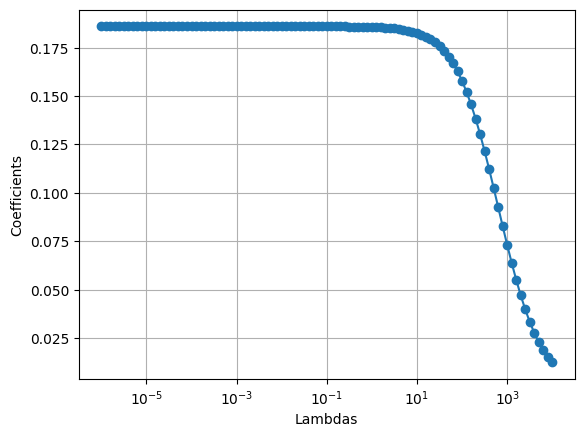

In [ ]:
plt.figure()
plt.plot(lambdas, coefficients, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Lambdas')
plt.ylabel('Coefficients')
plt.grid(True)
plt.show()

In [ ]:
ridge = skl.ElasticNet(alpha=tuned_ridge.alpha_, l1_ratio=0)
scaler = StandardScaler(with_mean=True, with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.1, l1_ratio=0))])

In [ ]:
train_pred = pipe.predict(X_train)
print('Training MSE:', np.mean((y_train - train_pred)**2))

Training MSE: 0.16286786373528273


In [ ]:
test_pred = pipe.predict(X_test)
print('Test MSE:', np.mean((y_test - test_pred)**2))

Test MSE: 0.14439642766241023


In [ ]:
lassoCV = skl.ElasticNetCV(n_alphas=100,
                           l1_ratio=1,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler), ('lasso', lassoCV)])
pipeCV.fit(X_train, y_train)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

0.002914149349285369

In [ ]:
print(X_train.columns.values)
print(tuned_lasso.coef_)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']
[ 0.05191683  0.18206422 -0.0428294   0.00571822 -0.02007508  0.10597085
  0.044806    0.04032109]


In [ ]:
coefficients = []

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

for alpha in lambdas:
    lasso_model = skl.Lasso(alpha=alpha)
    lasso_model.fit(X_train_scaled, y_train)
    coefficients.append(lasso_model.coef_[1])

coefficients = np.array(coefficients)

coefficients

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02091848, 0.06195539, 0.09455217,
       0.11608093, 0.13273674, 0.14281455, 0.15019374, 0.15544418,
       0.15961173, 0.16304012, 0.16590912, 0.16818804, 0.17086468,
       0.17365844, 0.17587759, 0.17764033, 0.17921461, 0.18061488,
       0.18172715, 0.18261066, 0.18331246, 0.18386991, 0.18431272,
       0.18466445, 0.18494384, 0.18516577, 0.18534205, 0.18548

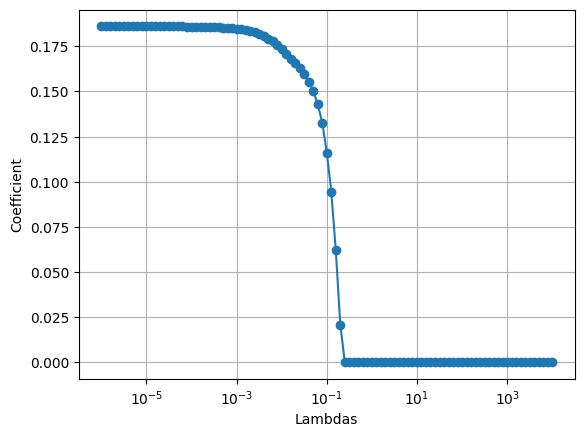

In [ ]:
plt.figure()
plt.plot(lambdas, coefficients, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Lambdas')
plt.ylabel('Coefficient')
plt.grid(True)
plt.show()

In [ ]:
lasso = skl.ElasticNet(alpha=tuned_lasso.alpha_, l1_ratio=1)
scaler = StandardScaler(with_mean=True, with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('lasso', lasso)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', ElasticNet(alpha=0.002914149349285369, l1_ratio=1))])

In [ ]:
train_pred = pipe.predict(X_train)
print('Training MSE:', np.mean((y_train - train_pred)**2))

Training MSE: 0.16247973108088098


In [ ]:
test_pred = pipe.predict(X_test)
print('Test MSE:', np.mean((y_test - test_pred)**2))

Test MSE: 0.14345092756833241


In [ ]:
import sklearn.model_selection as skm
from ISLP.models import ModelSpec as MS
from matplotlib.pyplot import subplots

In [ ]:
from sklearn.tree import DecisionTreeRegressor as DTR

In [ ]:
model = MS(X_train, intercept=False)
D = model.fit_transform(X_train)
feature_names = list(X_train.columns)
X = np.asarray(D)

In [ ]:
reg = DTR(random_state=123)
reg.fit(X_train, y_train)
print('Training MSE:', np.mean((y_train - reg.predict(X_train))**2))
print('Test MSE:', np.mean((y_test - reg.predict(X_test))**2))

Training MSE: 0.0
Test MSE: 0.23376623376623376


In [ ]:
from sklearn.tree import plot_tree

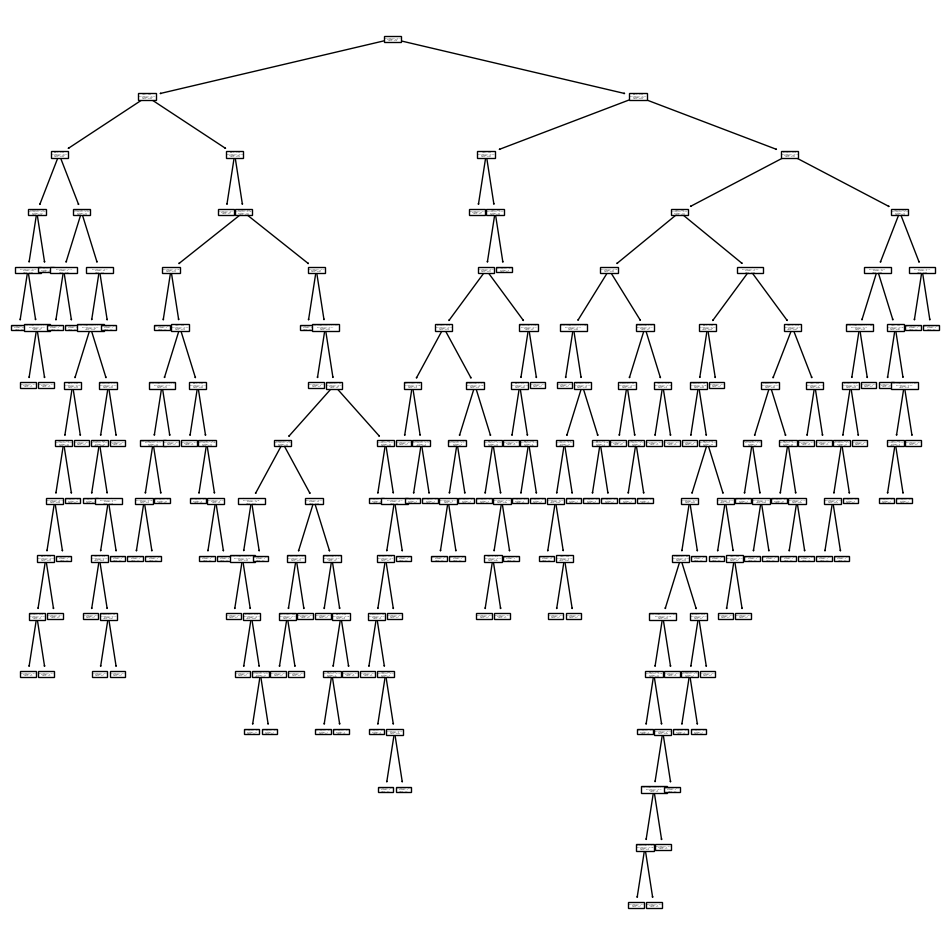

In [ ]:
# Plot the regression tree
ax = subplots(figsize=(12,12))[1]
plot_tree(reg,
          feature_names=feature_names,
          ax=ax);

In [ ]:
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
num_samples_per_splits = np.arange(2,11,2)
num_min_samples_leaf = range(1,6)


param_grid = {'ccp_alpha': ccp_path.ccp_alphas,
              'min_samples_split': num_samples_per_splits,
              'min_samples_leaf': num_min_samples_leaf
             }


kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)


grid = skm.GridSearchCV(reg,
                        param_grid,
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')


G = grid.fit(X_train, y_train)

best_ = grid.best_estimator_
print(grid.best_params_, np.mean((y_test - best_.predict(X_test))**2))

{'ccp_alpha': 0.007048511650839348, 'min_samples_leaf': 1, 'min_samples_split': 2} 0.17416672678529732


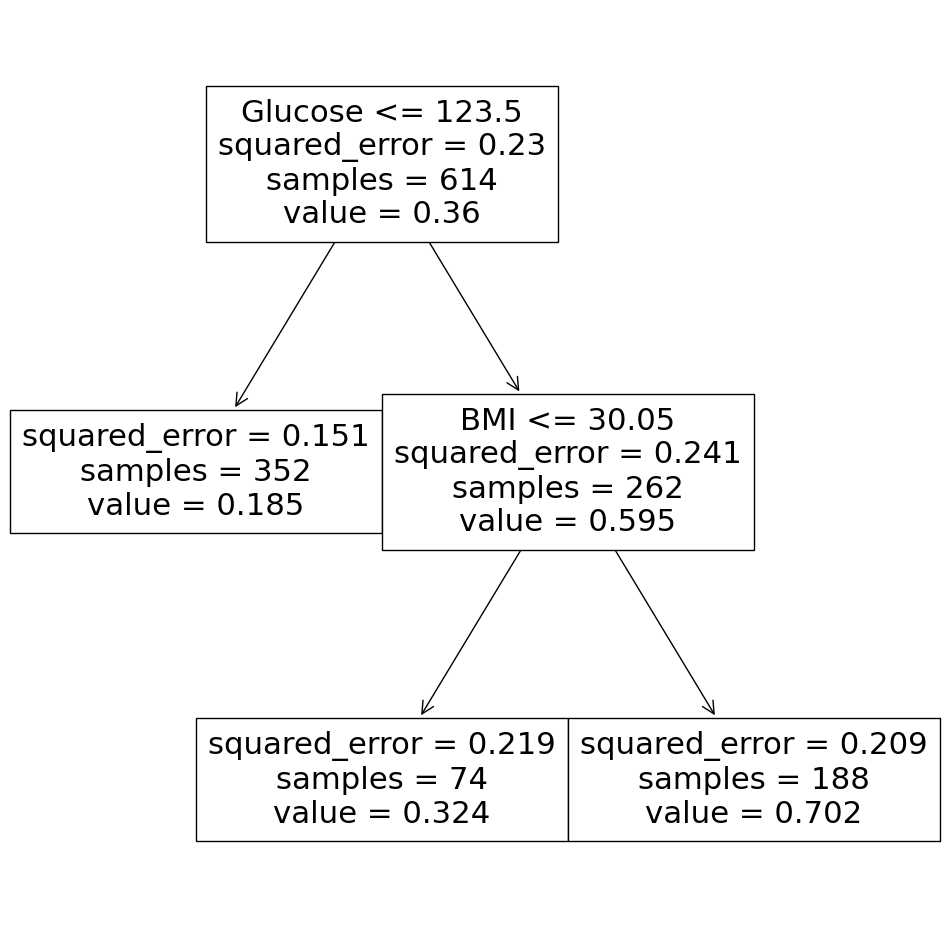

In [ ]:
ax = subplots(figsize=(12,12))[1]

plot_tree(best_,
          feature_names=feature_names,
          ax=ax);

In [ ]:
print('Training MSE:', np.mean((y_train - best_.predict(X_train))**2))
print('Test MSE:', np.mean((y_test - best_.predict(X_test))**2))

Training MSE: 0.17676306880015555
Test MSE: 0.17416672678529732


In [ ]:
from sklearn.ensemble import RandomForestRegressor as RF

In [ ]:
train_errs = list()
test_errs = list()
for m in range(3,14):
    rf = RF(max_features=m, random_state=123).fit(X_train, y_train)

    y_train_pred_RF = rf.predict(X_train)
    train_err = np.mean((y_train - y_train_pred_RF)**2)

    y_test_pred_RF = rf.predict(X_test)
    test_err = np.mean((y_test - y_test_pred_RF)**2)

    feature_imp = pd.DataFrame({'importance':rf.feature_importances_}, index=feature_names)
    feature_imp_sorted =feature_imp.sort_values(by='importance', ascending=False)
    top_three_features = feature_imp_sorted.head(3).index.tolist()

    print('For m is', m, 'Train MSE:', train_err, 'Test MSE:', test_err, 'Top three features are:', top_three_features)
    train_errs.append(train_err)
    test_errs.append(test_err)

For m is 3 Train MSE: 0.02327100977198697 Test MSE: 0.13882727272727274 Top three features are: ['Glucose', 'BMI', 'Age']
For m is 4 Train MSE: 0.023557166123778506 Test MSE: 0.14179155844155844 Top three features are: ['Glucose', 'BMI', 'Age']
For m is 5 Train MSE: 0.02353501628664495 Test MSE: 0.1415175324675325 Top three features are: ['Glucose', 'BMI', 'Age']
For m is 6 Train MSE: 0.02414983713355049 Test MSE: 0.14604805194805193 Top three features are: ['Glucose', 'BMI', 'DiabetesPedigreeFunction']
For m is 7 Train MSE: 0.02392671009771987 Test MSE: 0.13949740259740262 Top three features are: ['Glucose', 'BMI', 'Age']
For m is 8 Train MSE: 0.023735179153094466 Test MSE: 0.14437727272727274 Top three features are: ['Glucose', 'BMI', 'DiabetesPedigreeFunction']
For m is 9 Train MSE: 0.023735179153094466 Test MSE: 0.14437727272727274 Top three features are: ['Glucose', 'BMI', 'DiabetesPedigreeFunction']
For m is 10 Train MSE: 0.023735179153094466 Test MSE: 0.14437727272727274 Top thr

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [ ]:
boost = GBR(n_estimators=1000,
            learning_rate=0.02,
            max_depth=1,
            random_state=0)
boost.fit(X_train, y_train)

y_hat_boost = boost.predict(X_test)
np.mean((y_test - y_hat_boost)**2)

0.13775112670633036

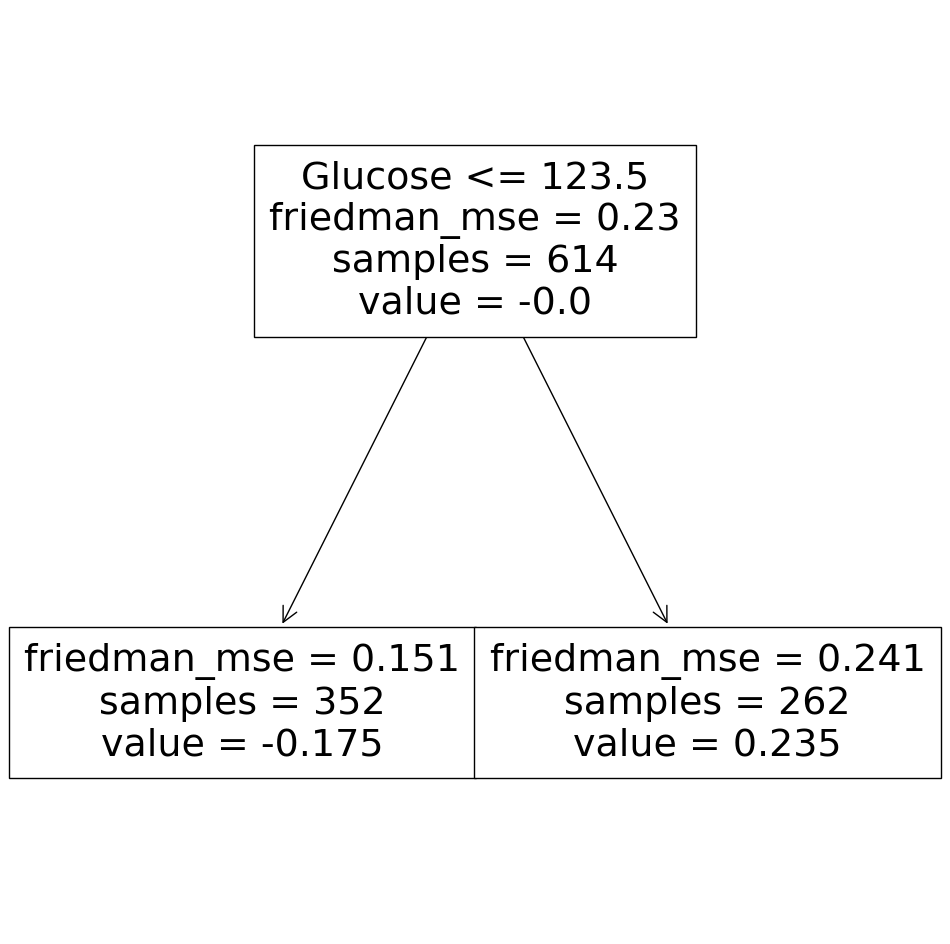

In [ ]:
ax = subplots(figsize=(12,12))[1]
plot_tree(boost.estimators_[0][0],
          feature_names=feature_names,
          ax=ax);

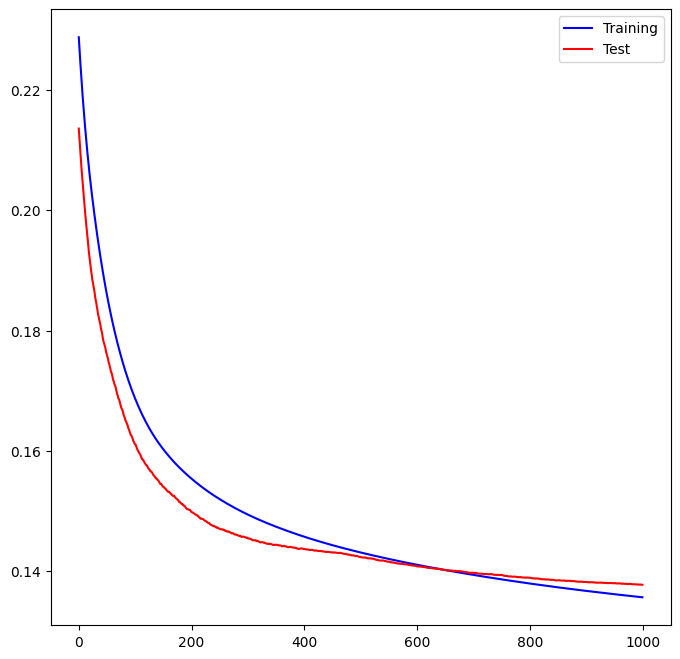

In [ ]:
test_error = np.zeros_like(boost.train_score_)

for idx, y_ in enumerate(boost.staged_predict(X_test)):
    test_error[idx] = np.mean((y_test - y_)**2)

plot_idx = np.arange(boost.train_score_.shape[0])
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,
        boost.train_score_, 'b',
        label='Training')

ax.plot(plot_idx, test_error ,
        'r',label='Test')
ax.legend()

In [ ]:
num_estimators = np.arange(1, 1000, 50)
num_depths = np.arange(1,5,1)
num_learning_rate = np.arange(0.001,0.1,0.01)


param_grid = {'n_estimators': num_estimators,
        'max_depth': num_depths,
        'learning_rate': num_learning_rate
        }

boost = GBR(learning_rate=0.02,
            max_depth=1,
            random_state=123)

kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)

grid = skm.GridSearchCV(boost,
                        param_grid,
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')

G = grid.fit(X_train, y_train)

best_ = grid.best_estimator_
print(grid.best_params_, np.mean((y_test - best_.predict(X_test))**2))

{'learning_rate': 0.020999999999999998, 'max_depth': 2, 'n_estimators': 201} 0.14423576636206376
